<a id='top'></a>

# Titanic: Machine Learning from Disaster
### By Edd Webster
Notebook last updated: 01/01/2020

![title](img/kaggle_python_logos.png)

![title](img/titanic_sinking.png)

Click [here](#section4) to jump straight to the Exploratory Data Analysis section and skip the [Notebook Setup](#section2), [Kagggle Competition Overview](#section3), and [Data Sources](#section4) sections. Or you can click [here](#section12) to jump straight to the Conclusion.

<a id='section1'></a>

## Introduction
This notebook is an Exploratory Data Analysis (EDA) of the famous [Kaggle Titanic dataset](https://www.kaggle.com/c/titanic/data) with Python for a competition submission.

For more information about this notebook and the author, I'm available through all the following channels:
*    [EddWebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [GitHub/eddwebster](https://github.com/eddwebster/),
*    [Kaggle.com/eddwebster](https://www.kaggle.com/eddwebster), and
*    [HackerRank.com/eddwebster](https://www.hackerrank.com/eddwebster).

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/kaggle-titanic) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/deliveroo/blob/master/Kaggle%20Titanic%20EDA%2023122019.ipynb).

***The original competition webpage can be found at: http://www.kaggle.com/c/titanic-gettingStarted***<br>
***FAQs for the competition can be found at: https://www.kaggle.com/c/titanic/overview/frequently-asked-questions***

<a id='section2'></a>

## Notebook Contents
1.    [Notebook Setup](#section1)
      +    Required Libraries for this Notebook
      +    Import Modules and Libraries
2.    [Kaggle Competition Overview](#section2)
      +    Description
           -   Competition Description
           -   Practice Skills
      +    Evaluation
           -   Goal
           -   Metric
           -   Submission File Format
3.    [Data Sources](#section3)
      +    Overview
      +    Data Dictionary
      +    Variable Notes
4.    [Exploratory Data Analysis](#section4)
      +    Survived (target feature)
      +    Pclass
      +    Name
      +    Sex
      +    Age
      +    SibSp
      +    Parch
      +    Ticket
      +    Fare
      +    Cabin
      +    Embarked
5.    [Feature Engineering](#section5)
6.    [Machine Learning Modelling](#section6)
7.    [Model Results](#section7)
8.    [Feature Importance](#section8)
9.    [Precision and Recall](#section9)
10.    [Kaggle Submission](#section10)
11.    [Next Steps](#section12)
12.    [Conclusion](#section11)
13.    [Bibliography](#section13)

<a id='section1'></a>

## 1. Notebook Setup

### Required Libraries for this Notebook
This notebook uses [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [IPython](https://jupyter.org/) for this interactive computational environment that the project is presented,
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/) for data visualisation,
*    [scikit-learn](https://scikit-learn.org/) and [SciPy](https://docs.scipy.org/doc/scipy/) for machine learning and predictive modeling, and
*    [Catboost](https://catboost.ai/) for a specific gradient boosting on-decision trees library Machine Learning algorithm that's not included in the Conda distribution

All packages listed below (except for missingno and Catboost) can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX).

### Import Modules and Libraries

In [121]:
# All packages listed below (except for the few where otherwise stated) can be obtained by downloading and installing the Conda distribution, available on all platforms (Windows, Linux and Mac OSX) here: https://anaconda.org/anaconda/conda

# Python ≥3.5 (ideally)
import sys
assert sys.version_info >= (3, 5)

# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Math Operations
import numpy as np

# Data Preprocessing
import pandas as pd
import os
pd.options.display.max_columns = 100
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # Not included in Conda package. Use 'pip install missingno' in the command line to install
import pylab as plot

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import catboost    # pip install catboost if you don't have it
from catboost import CatBoostClassifier, Pool, cv

# Display in Jupyter and center plots
from IPython.display import Image, display, HTML
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# Ignore warnings in notebook
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


<a id='section2'></a>

## 2. Kaggle Competition Overview

### Description
The following brief has been copied and pasted from the [Overview on the Kaggle Competition page](https://www.kaggle.com/c/titanic/overview) and is included in this Jupyter notebook for reference. Click [here](#section3) to skip to the next section where the the data sources are described in more detail.
>#### Competition Description
>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
>
>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
>
>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
>
>#### Practice Skills
>*   Binary classification
>*   Python basics
>
>### Evaluation
>
>#### Goal
>*   This report should predict if a passenger survived the sinking of the Titanic or not.
>*   For each in the test set, a value of 0 or 1 must be predicted and assigned to the variable.
>
>#### Metric
>The report's score is the percentage of passengers correctly predicted, more simply put, this is '[accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification)'.
>
>#### Submission File Format
>*   You should submit a CSV file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.
>*   The file should have exactly 2 columns:
>*   PassengerId (sorted in any order)
>*   Survived (contains your binary predictions: 1 for survived, 0 for deceased)

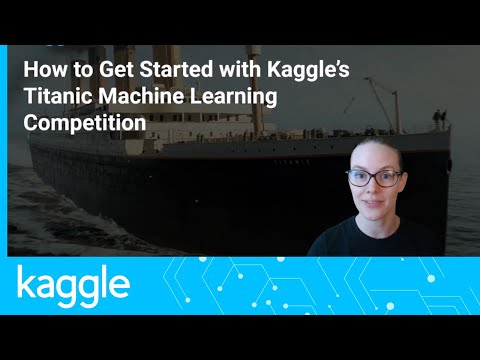

In [2]:
# How to Get Started with Kaggle's Titanic Machine Learning Competition
from IPython.display import YouTubeVideo
YouTubeVideo('8yZMXCaFshs')

### Objectives
To predict the survival of the passengers in the dataset, based their associated features: such as age, sex, passenger class on the boat, etc.


### Methodology Overview
The methodology of the data analysis is broken down in the following three sections:
*    I - Exploratory Data Analysis ([Section 4](#section4))
*    II - Feature Engineering ([Section 5](#section5))
*    III - Machine Learning Modelling ([Section 6](#section6))


### Data Science Techniques Observed in this Notebook

#### Data Handling
*   Importing Data with Pandas
*   Cleaning Data
*   Exploring Data through Visualizations with Seaborn and Matplotlib

#### Data Analysis
*   Supervised Machine learning Techniques:
    +   Logistic Regression Model 
    +   Plotting results
    +   Support Vector Machine (SVM) using 3 kernels
    +   Basic Random Forest
    +   Plotting results

#### Valuation of the Analysis
*   K-folds cross validation to valuate results locally
*   Output the results from the IPython Notebook to Kaggle

<a id='section3'></a>

## 3. Data Sources
The following brief has been copied and pasted from the [Data section of the Kaggle Competition page](https://www.kaggle.com/c/titanic/data) and is included in this Jupyter notebook for reference. Click [here](#section4) to skip to the next section where the proper coding begins.

>### Overview
>The data has been split into two groups:
>*   training set (`train.csv`)
>*   test set (`test.csv`)
>
>The **training set** is to be used for to build machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use [feature engineering](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) to create new features.
>
>The **test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.
>
>We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.
>
>### Data Dictionary
>The dataset has ten different features with the following definitions and keys:
>
>| Variable     | Definition     | Key     |
>|------|-----|-----|
>| `survival`    | Survival     | 0 = No, 1 = Yes     |
>| `pclass`    | Ticket class     | 1 = 1st, 2 = 2nd, 3 = 3rd     |
>| `sex`    | Sex     |      |
>| `Age`    | Age in years     |      |
>| `sibsp`    | # of siblings / spouses aboard the Titanic     |      |
>| `parch`    | # of parents / children aboard the Titanic     |      |
>| `ticket`    | Ticket number     |      |
>| `fare`    | Passenger fare     |      |
>| `cabin`    | Cabin number     |      |
>| `embarked`    | 	Port of Embarkation     | C = Cherbourg, Q = Queenstown, S = Southampton     |
>
>### Variable Notes
>**pclass:** A proxy for socio-economic status (SES)<br>
>1st = Upper<br>
>2nd = Middle<br>
>3rd = Lower
>
>**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
>
>**sibsp:** The dataset defines family relations in this way...<br>
>Sibling = brother, sister, stepbrother, stepsister<br>
>Spouse = husband, wife (mistresses and fiancés were ignored)
>
>**parch:** The dataset defines family relations in this way...<br>
>Parent = mother, father<br>
>Child = daughter, son, stepdaughter, stepson<br>
>Some children travelled only with a nanny, therefore parch=0 for them.

The `Survived` feature is the **target** variable. If Survival = 1 the passenger survived and if Survival = 0, the unfortunately didn't make it. This feature is what we'll first analyse and later on we'll go on to predict once we get to the Machine Learning modelling ([Section 6](#section6)).

### Data Import
First, let's import the CSVs files provided, 'train.csv' and 'test.csv', to this Jupyter notebook as a Pandas DataFrame.

In [3]:
# Import Train and Test CSV data sets to Jupter Notebook as a `Pandas DataFrame`
filepath_train = "./data/train.csv"
filepath_test = "./data/test.csv"
filepath_gender_submission = "./data/gender_submission.csv"

df_train = pd.read_csv(filepath_train)
df_test = pd.read_csv(filepath_test)
df_gender_submission = pd.read_csv(filepath_gender_submission)    # example of what the Kaggle submission should look like

### Initial Data Handling

#### View first and last rows of the of the Train, Test and Gender Submission `DataFrame`s
Let's quality of the dataset by looking first and last rows, using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [4]:
# Display the first five rows of the Train DataFrame, df_train
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Display the first five rows of the Test DataFrame, df_test
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Display the first five rows of the Gender Submission DataFrame, df_gender_submission, an example Kaggle submission
df_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
# Display the last five rows of the Train DataFrame, df_train
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# Display the first last rows of the Test DataFrame, df_test
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
# Display the last five rows of the Gender Submission DataFrame, df_gender_submission, an example Kaggle submission
df_gender_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


#### View shape of the Train and Test `DataFrame`s

In [10]:
# Print the shape of the Train DataFrame, df_train
print(df_train.shape)

(891, 12)


The `Train` DataFrame has:
*    891 observations (rows), each observation represents a unique passenger, and
*    12 attributes (columns).

In [11]:
# Print the shape of the Test DataFrame, df_test
print(df_test.shape)

(418, 11)


The `Test` DataFrame has:
*    418 observations, and
*    12 attributes.

#### View features of the Train and Test `DataFrame`s

In [12]:
# Features (column names) of the Train DataFrame, df_train
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# Features (column names) of the Test DataFrame, df_test
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### View dtypes of the Train `DataFrame`

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [14]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### View info of the Train `DataFrame`

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [15]:
# Info for the Train DataFrame, df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We know that our dataset is 891 rows long. We can therefore see that the `Age`, `Cabin`, and `Embarked` attributes have missing values. We will look into this in more detail in the next sections.

#### View description of the Train `DataFrame`

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical attribute in the DataFrame.

In [16]:
# Description of the Train DataFrame, df_train, showing some summary statistics for each numberical column in the DataFrame
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### View missing values
Next, we need to look aty the missing missing Data in Train `DataFrame` i.e. count the number of the of `NaN` values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno if you don't already have this installed).

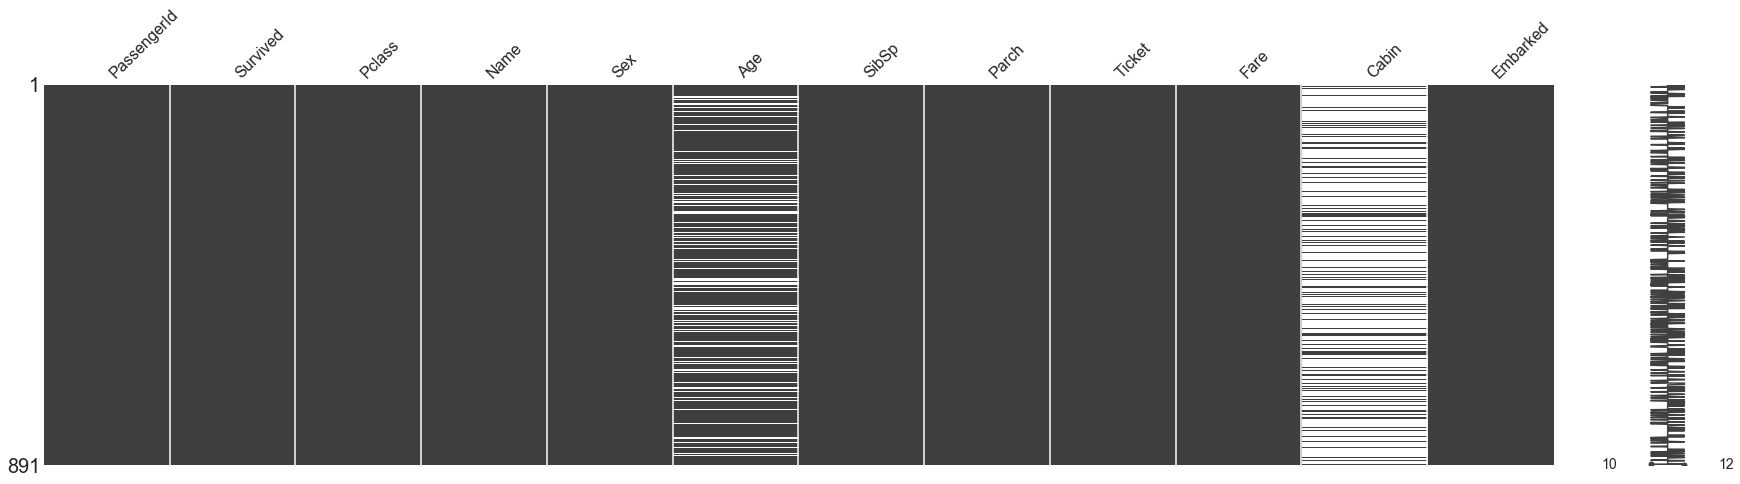

In [17]:
# Plot visualisation of the missing values for the Train DataFrame, df_train
msno.matrix(df_train, figsize = (30, 7))

In [18]:
# Counts of missing values for the Train DataFrame, df_train
null_value_stats = df_train.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

The visualisation shows us very quickly that there is a large number of mssing values in the `Age` and `Cabin` attributes, 177 and 687 respectively (determined by the [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) counts). We can also see there are two values missing for the `Embarked` attribute.

These three attributes will need to be cleaned and preprocessed.

<a id='section4'></a>

## 4. Exploratory Data Analysis (EDA)

We'll iteratively explore each of the ten attributes and see which ones to use in our first models.
Some need more preprocessing than others to get ready. These features are:
*    `Survived` (target feature),
*    `Pclass`,
*    `Name`,
*    `Sex`,
*    `Age`,
*    `SibSp`,
*    `Parch`,
*    `Ticket`,
*    `Fare`,
*    `Cabin`, and
*    `Embarked`.

### Seperating continuous and discretised variables

To perform our data analysis, let's create two new DataFrames. We'll create one for exploring **discretised continuous variables** (continuous variables which have been sorted into some kind of category) and another for exploring **continuous variables**. This seperation of the values into two sub-DataFrames allows for the running of different types of models over each type of DataFrame.

In [19]:
df_bin = pd.DataFrame()    # for discretised continuous variables
df_con = pd.DataFrame()    # for continuous variables

### Target Feature: Survived

**Definition:** Whether the passenger survived or not.<br>
**Key:** 0 = did not survive, 1 = survived
    
This is the variable to be used in the machine learning model to predict based off all the other attributes.

0    549
1    342
Name: Survived, dtype: int64


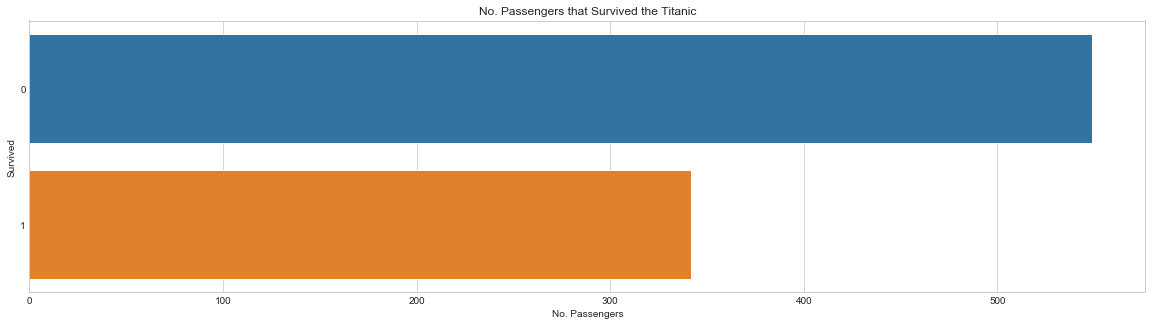

In [20]:
# Set the width and height of the figure
fig = plt.figure(figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("No. Passengers that Survived the Titanic")

# Bar chart showing the number of passengers that survived the Titanic
sns_plot_4_1 = sns.countplot(y='Survived', data=df_train)

# Add labels for axes
plt.xlabel("No. Passengers")
plt.ylabel("Survived")

# Save plot
fig_4_1 = sns_plot_4_1.get_figure()
fig_4_1.savefig("./figures/4_1.png") 

# Print values
print(df_train['Survived'].value_counts())

In [21]:
# Count of missing values for Survived
df_train['Survived'].isnull().sum()

0

A comparison of the two groups reveals that more than 60% of the passengers died.

Before plotting the `Survived` Feature, considering it's the Target Feature we knew that it would be added to the sub DataFrames. Let's go ahead and do that now.

In [22]:
# Add Target Feature, Survived, to the subset DataFrames, df_bin and df_con
df_bin['Survived'] = df_train['Survived']
df_con['Survived'] = df_train['Survived']

In [23]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [24]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature: Pclass

**Definition:** The ticket class of the passenger.<br>
**Key:** 1 = 1st, 2 = 2nd, 3 = 3rd
    
In this feature, the values are nominal variables. They are numerical (1, 2 and 3) but they are categories.

3    491
1    216
2    184
Name: Pclass, dtype: int64


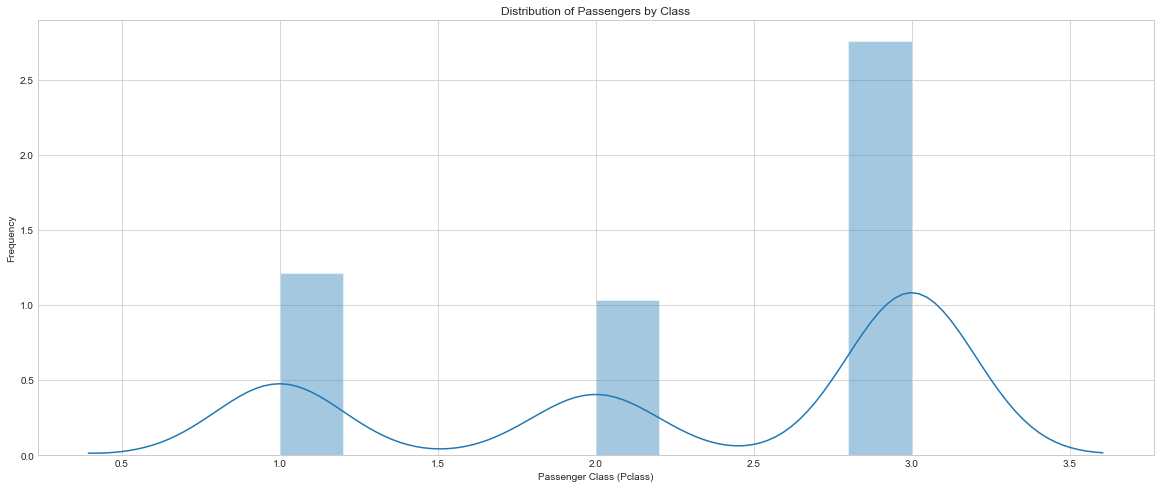

In [25]:
# Set the width and height of the figure
fig = plt.figure(figsize=(20,8))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Distribution of Passengers by Class")

# Bar chart showing 
sns_plot_4_2 = sns.distplot(df_train['Pclass'])

# Add labels for axes
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Frequency")

# Save plot
fig_4_2 = sns_plot_4_2.get_figure()
fig_4_2.savefig("./figures/4_2.png") 

# Print values
print(df_train['Pclass'].value_counts())

In [26]:
# Count of missing values for PClass
df_train['Pclass'].isnull().sum()

0

The plot shows the spread of the dataset. The Third class had the highest number of passengers (491), followed by the First class (216) and the Second class (184) passengers. The number of tourists in the Third class was more than the number of passengers in the First and Second class combined. The survival chances of a First class passengers is higher than the Second and Third class passengers.

Since there are no missing values in `Pclass`, let's add it to our sub dataframes.

In [27]:
# Add PClass Feature to the subset DataFrames, df_bin and df_con
df_bin['Pclass'] = df_train['Pclass']
df_con['Pclass'] = df_train['Pclass']

### Feature: Name
    
**Definition:** The name of the passenger.
    
The values of this feature are nominal variables (categories).

In [28]:
# Value counts of the different names
df_train['Name'].value_counts()

Kelly, Mr. James                    1
Keane, Mr. Andrew "Andy"            1
Olsvigen, Mr. Thor Anderson         1
Silverthorne, Mr. Spencer Victor    1
McCarthy, Mr. Timothy J             1
                                   ..
Dennis, Mr. Samuel                  1
Hays, Miss. Margaret Bechstein      1
Ryan, Mr. Patrick                   1
Gillespie, Mr. William Henry        1
Richards, Master. George Sibley     1
Name: Name, Length: 891, dtype: int64

Every row, all 891 of them,has a unique name and is equivalent in that respect to the passenger ID. 

However, we can use names differently to garner additional information, such as:
*    Reduce the number of different names,
*    Create new features from the names e.g. extract Mr, Mrs, Miss for gender, titles for the social class of the passenger etc. Gender is less useful as this is given to use in the `Sex` feature (see next section).

### Feature: Sex

**Definition:** The sex of the passenger (male or female).

The values of this feature are nominal variables (categories).

male      577
female    314
Name: Sex, dtype: int64


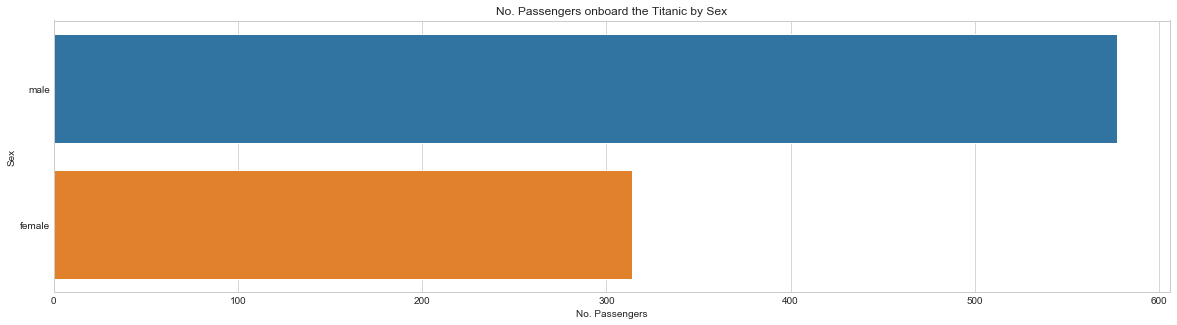

In [29]:
# Set the width and height of the figure
fig = plt.figure(figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("No. Passengers onboard the Titanic by Sex")

# Bar chart showing the number of passengers onboard the Titanic by Sex
sns_plot_4_3 = sns.countplot(y='Sex', data=df_train)

# Add labels for axes
plt.xlabel("No. Passengers")
plt.ylabel("Sex")

# Save plot
fig_4_3 = sns_plot_4_3.get_figure()
fig_4_3.savefig("./figures/4_3.png") 

# Print values
print(df_train['Sex'].value_counts())

In [30]:
# Count of missing values for Sex
df_train['Sex'].isnull().sum()

0

Approximately 65% of the tourists (577) were Male while the remaining 35% were Female (314). 

Since `Sex` is already a binary variable (male or female), let's add it straight to our subset dataframes. Let's also convert the variables to 0 for male and 1 for female using the [np.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html#numpy.where) method. This is a much more useful format for the ML models lader on.

In [31]:
# Add Sex Feature to the subset DataFrames, df_bin and df_con
df_bin['Sex'] = df_train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)    # change Sex to 0 for male and 1 for female

df_con['Sex'] = df_train['Sex']

male      577
female    314
Name: Sex, dtype: int64


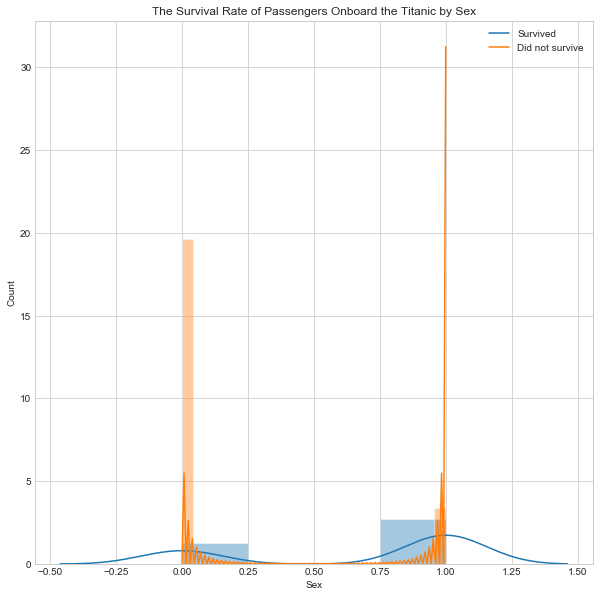

In [32]:
# Set the width and height of the figure
fig = plt.figure(figsize=(10,10))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("The Survival Rate of Passengers Onboard the Titanic by Sex")

# Bar chart showing the survival rate of passengers onboard the Titanic by Sex
sns_plot_4_4 = sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns_plot_4_4 = sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

# Add labels for axes
plt.xlabel("Sex")
plt.ylabel("Count")

# Save plot
fig_4_4 = sns_plot_4_4.get_figure()
fig_4_4.savefig("./figures/4_4.png") 

# Print values
print(df_train['Sex'].value_counts())

As noted in the first plot, approximately 65% of the tourists were Male while the remaining 35% were Female. However, the percentage of Female survivors was higher than the number of Male survivors. More than 80% of Male passengers died, wheres around 70% of the Female Passengers sruvived. Not many people survived but of those who did, more were Female. Bringing to mind the code of conduct often seen on sinking ships of ['Women and children first'](https://en.wikipedia.org/wiki/Women_and_children_first).

### Feature: Age

**Definition:** The age of the passenger.

The values of this feature are discreet, continuous variables.

In [33]:
# Count of missing values for Age
df_train['Age'].isnull().sum()

177

The count shows that 177 values are missing for the `Age` feature, that's almost one quarter of the dataset. We have several options when dealing with these missing values

First, we could get rid of this column completely. However, it could have some useful information that would just be disregarded. We could also just delete the 177 rows that have a NULL value for this feature, however, as previously stated, we would be disregarding nearly a quarter of what is already quite a small dataset.

A quick solution is to fill in the null values with the median age that has been observed in the dataset. We could also impute with the mean age but the median is more robust to outliers.

In [34]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

Let's now check to see if this NULL values are no longer there

In [35]:
# Count of missing values for Age
df_train.Age.isnull().sum()

0

Now that there are no NULL values, let's add the Age Feature to the subset DataFrames, `df_bin` and `df_con`

In [36]:
# Add the Age Feature to the subset DataFrames, df_bin and df_con
df_bin['Age'] = pd.cut(df_train['Age'], 10)    # bucketed/binned into different categories
df_con['Age'] = df_train['Age']    # non-bucketed

There are much better ways to fill the missing variables in the `Age` column. I've left some space below to come back to this.

#### Function to create count and distribution visualisations

In [37]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

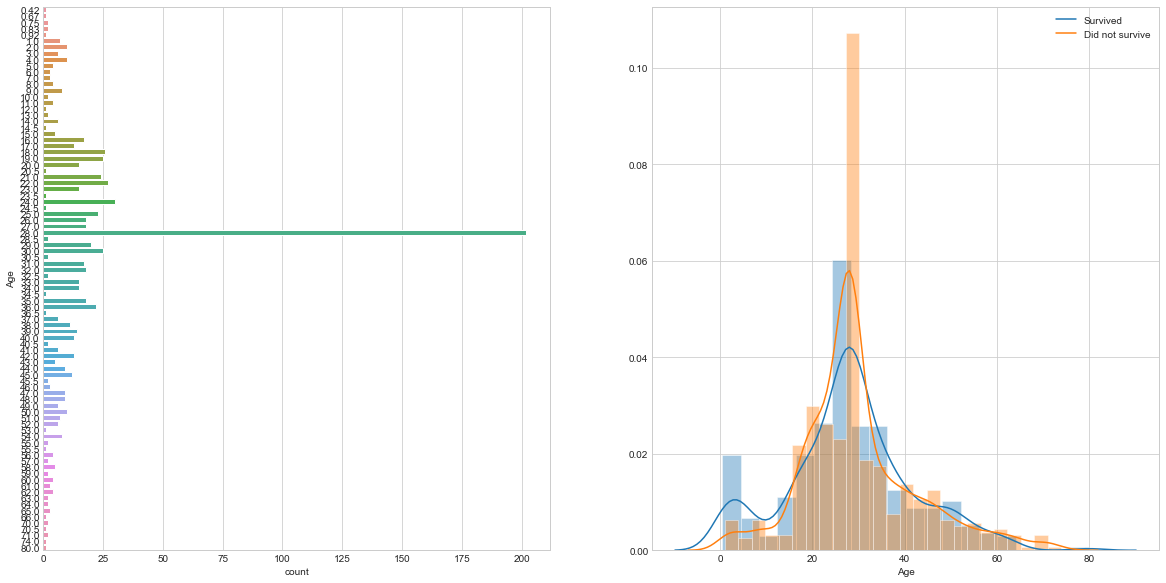

In [38]:
# Plot style
sns.set_style("whitegrid")

# Visualise the counts of SibSp and the distribution of the values dagainst Survived
plot_count_dist(df_train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='Age', 
                figsize=(20, 10))

The youngest traveler onboard was aged around two months and the oldest traveler was 80 years. The average age of tourists onboard was just under 30 years. Clearly, a larger fraction of children under 10 survived than died. or every other age group, the number of casualties was higher than the number of survivors. More than 140 people within the age group 20 and 30 were dead as compared to just around 80 people of the same age range sustained.

### Feature: SibSp

**Definition:** The number of siblings/spouses the passenger has aboard the Titanic.

The values of this feature are discreet, continuous variables.

In [39]:
# Count of missing values for SibSp
df_train['SibSp'].isnull().sum()

0

In [40]:
# Count of each values for SibSp
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

A maximum of 8 siblings and spouses traveled along with one of the passengers. More than 90% of people traveled alone or with one of their sibling or spouse.

In [41]:
# Add the SibSp Feature to the subset DataFrames, df_bin and df_con
df_bin['SibSp'] = df_train['SibSp']
df_con['SibSp'] = df_train['SibSp']

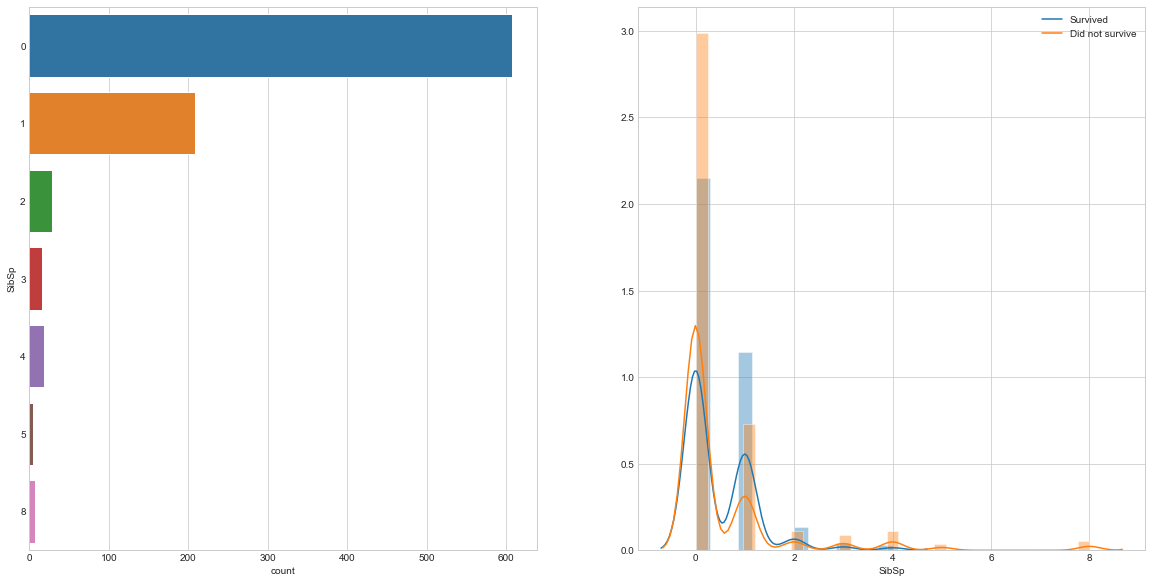

In [42]:
# Plot style
sns.set_style("whitegrid")

# Visualise the counts of SibSp and the distribution of the values dagainst Survived
plot_count_dist(df_train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

We already know when looking at the value counts that a maximum of 8 siblings and spouses traveled along with any of the passengers. More than 90% of people traveled alone or with one of their sibling or spouse. This is shown visually with the plot on the left-hand-side.

We can also see from the plot on the right-hand-side that if you had a spouse, your chances of survival are much higher. Passengers with 0 siblings had a much reduced chance of survival when compared with passengers with 1 or more siblings. Maybe, if you were a wife or had a child, you were more likely to be saved?

### Feature: Parch

**Definition:** The number of parents/children the passenger has aboard the Titanic.

The values of this feature are discreet, continuous variables.

In [43]:
# Count of missing values for Parch
df_train['Parch'].isnull().sum()

0

In [44]:
# Count of each values for Parch
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

A maximum of 6 parents/children traveled along with one of the passengers. Just under 90% of people that travelled alone or with one parent/child.

In [45]:
# Add the Parch Feature to the subset DataFrames, df_bin and df_con
df_bin['Parch'] = df_train['Parch']
df_con['Parch'] = df_train['Parch']

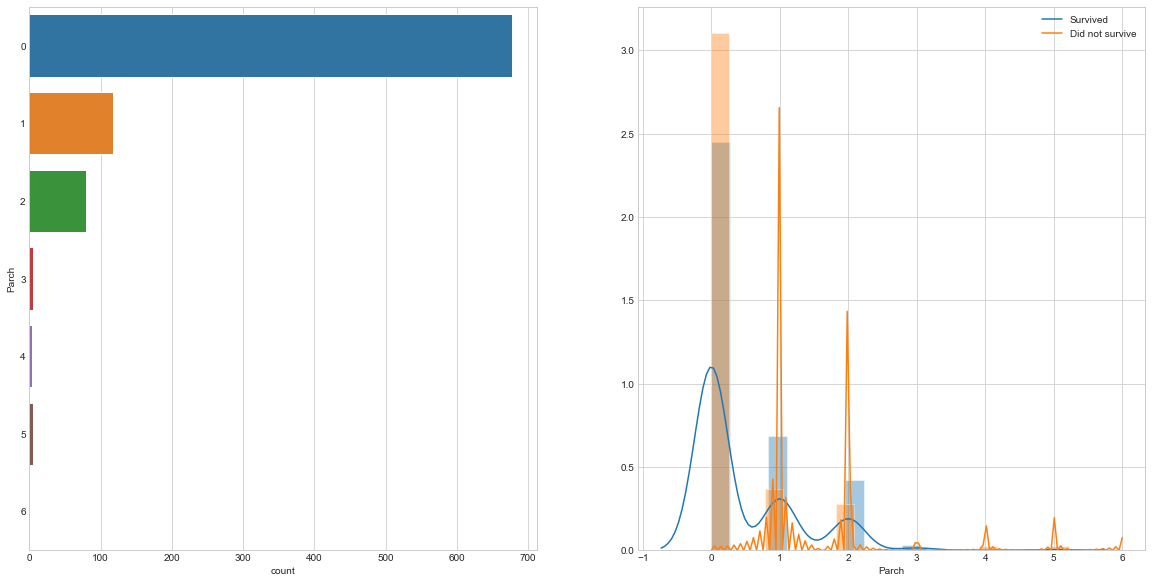

In [46]:
# Visualise the counts of Parch and the distribution of the values against Survived
plot_count_dist(df_train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

We already know when looking at the value counts that a maximum combination of 6 parents/children traveled along with any of the passengers. More than 90% of people traveled alone or with only one parent/child. This is shown visually with the plot on the left-hand-side.

We can also see from the plot on the right-hand-side that if you had a parent or child, your chances of survival are much higher. Passengers with 0 parents/children on board had a much reduced chance of survival when compared with passengers with 1 or more parents/children. Maybe, if you were a son/daughter or a parent, you were more likely to be saved?

### Feature: Ticket

**Definition:** The ticket number of the boarding passenger.

The values of this feature are continuous variables.

In [47]:
# Count of missing values for Ticker
df_train['Ticket'].isnull().sum()

0

In [48]:
# Count of each type of ticket
df_train['Ticket'].value_counts()
# df_train['Ticket'].value_counts()[:50]

347082        7
CA. 2343      7
1601          7
347088        6
3101295       6
             ..
347085        1
2624          1
237671        1
248698        1
F.C. 12750    1
Name: Ticket, Length: 681, dtype: int64

In [49]:
# Count of the number of unique kinds of Ticket
print("There are {} unique ticket values.".format(len(df_train['Ticket'].unique())))

There are 681 unique ticket values.


'CA. 2343' was used a maximum of 7 times, along with '347082' and '1601'. However, as we can see, there are so many different types of tickets, 681 to be precise, and they don't seem to have any particular naming/coding system.

681 unique values is too many for now. So we won't use `Ticket` in our subset DataFrames right now.

To be useful for Machine Learning models, we need to reduce down this high dimensionality. We need to think of how to reduce this. I have left some space below for this but on writing this session, I'm still conducting the initial EDA.

### Feature: Fare

**Definition:** How much the ticket cost.

The values of this feature are continuous variables.

In [50]:
# Count of missing values for Fare
df_train['Fare'].isnull().sum()

0

In [51]:
# Count of each values for Fare
df_train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [52]:
# dtype of Fare
df_train['Fare'].dtype

dtype('float64')

In [53]:
# Count of the number of unique kinds of Fare
print("There are {} unique Fare values.".format(len(df_train['Fare'].unique())))

There are 248 unique Fare values.


Because `Fare` is a Float let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [54]:
# Add Fare to sub dataframes
df_con['Fare'] = df_train['Fare'] 
df_bin['Fare'] = pd.cut(df_train['Fare'], bins=5)    # discretised 

In [55]:
# What do our Fare bins look like?
df_bin['Fare'].value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

We can see from our bins, there is a Fare that is negative 50 cents. Is this an outlier? Check

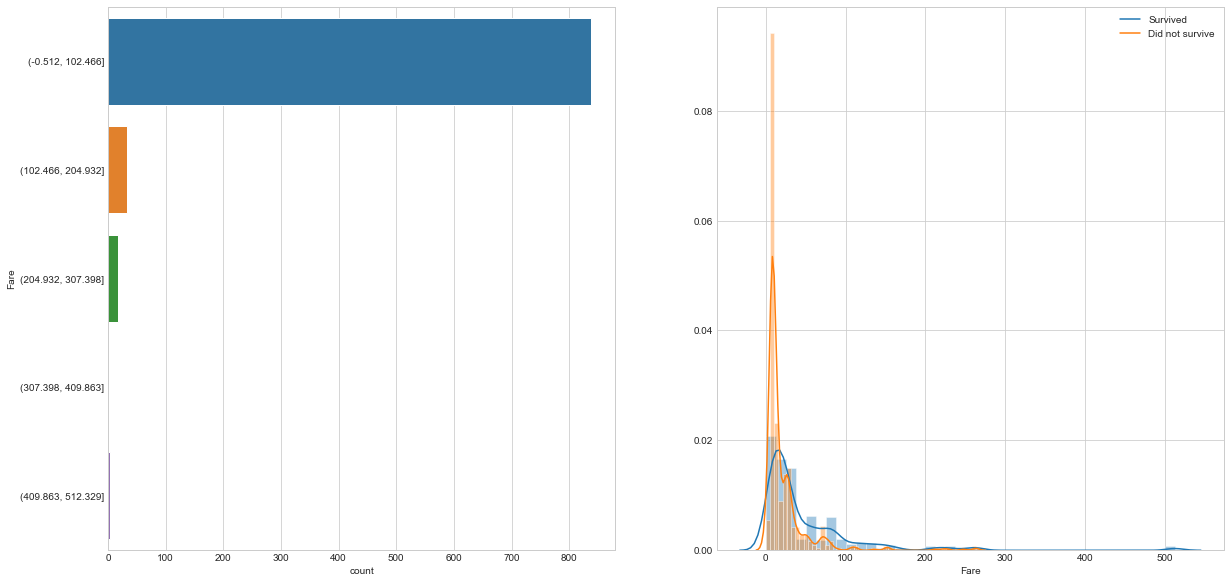

In [56]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=df_train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

By splitting the Fare amount into five bins, we can see there is a strong  correlation between the Fare cost and survival. The higher a tourist paid, the higher their chances are that they would survive.

We need to think of how to improve the Fare bins. How does the bins function work? Is this the best way we can segregate the data? I have left some space below for this but on writing this session, I'm still conducting the initial EDA.

### Feature: Cabin

**Definition:** The cabin number where the passenger was staying.

The values of this feature are continuous variables.

In [57]:
# Count of missing values for Cabin
df_train['Cabin'].isnull().sum()

687

There are 687 NULL values out of 891 rows. Therefore, the data set only has 204 values

In [58]:
# Count of each values for Cabin
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
F2             3
              ..
C103           1
B69            1
B79            1
D56            1
D19            1
Name: Cabin, Length: 147, dtype: int64

Since there are too many missing values, we won't use Cabin for our initial models and we therefore won't be adding to to our sub DataFrames.

We need to think of how to improve engineer the Cabin feature as to use this in our Machine Learning models. The questions that need to be answered are: how can we modify the cabin feature as so it's more usable; and what can we do about the missing values?

Maybe we can extract the letter e.g. B96 = B, G6 = G etc. and then look at the new bins.

I have left some space below for this but on writing this session, I'm still conducting the initial EDA.

Below is a diagram that provides some information about the Cabins in the Titanic.

![title](img/titanic_survival_infographic.jpg)

### Feature: Embarked

**Definition:** The port where the passenger boarded the Titanic.<br>
**Key:** C = Cherbourg, Q = Queenstown, S = Southampton

The values of this feature are categorical variables.

In [59]:
# Count of missing values for Embarked
df_train['Embarked'].isnull().sum()

2

S    644
C    168
Q     77
Name: Embarked, dtype: int64


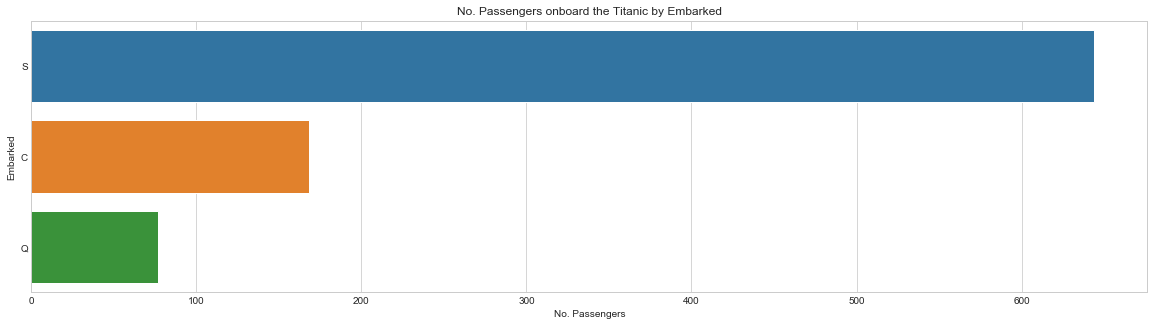

In [60]:
# Set the width and height of the figure
fig = plt.figure(figsize=(20,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("No. Passengers onboard the Titanic by Embarked")

# Bar chart showing the number of passengers onboard the Titanic by Embarked
sns_plot_4_10 = sns.countplot(y='Embarked', data=df_train)

# Add labels for axes
plt.xlabel("No. Passengers")
plt.ylabel("Embarked")

# Save plot
fig_4_10 = sns_plot_4_10.get_figure()
fig_4_10.savefig("./figures/4_10.png") 

# Print values
print(df_train['Embarked'].value_counts())

Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.

More than 70% of the people boarded from Southampton (644). Just under 20% boarded from Cherbourg (168) and the rest boarded from Queenstown (77).

Not shown in the current plot but people who boarded from Cherbourg had a higher chance of survival than people who boarded from Southampton or Queenstown. See the following link for a plot that shows that: https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca

#### How can we deal with the 2 missing values of Embarked?

One option is to drop the two rows which don't have an Embarked value.

Another option would be to randomly assign a value of C, Q or S to each row.

For now, we will remove those rows.

In [61]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = df_train['Embarked']
df_con['Embarked'] = df_train['Embarked']

In [62]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


We've removed the two rows with missing values for Embarked, now we can add Embarked to our sub `DataFrame`s.

<a id='section5'></a>

## 5. Feature Engineering

Now we have our two sub `DataFrame`s ready. We can encode the features so they're ready to be used with with Machine Learning models.

We will encode our two subset `DataFrame`s, `df_bin` and `df_con`, using [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) by [scikit-learn](https://scikit-learn.org/stable/).

An alternative could be to use the [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) function. For more detail as to why this decision was made, see this Medium article: https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621.

### `df_bin` Engineering

In [63]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,"(16.336, 24.294]",1,0,"(-0.512, 102.466]",S
1,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",C
2,1,3,1,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",S
3,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",S
4,0,3,0,"(32.252, 40.21]",0,0,"(-0.512, 102.466]",S


This `df_bin` dataset is already a bit smaller than the original dataset as we've removed the `Name`, `Ticket`, and `Cabin` columns. The intention is to go back after the initial ML process to try and use these features through Feature Engineering to further improve the accuracy of the models with the additional data. However, for now, we have elected to drop them for the datasets and subsequent modelling.

Next let's OneHotEncode the dataset as so the columns and data in the dataset are as **numbers** i.e. they are more suitable structure and format for ML algorithms.

In [64]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

In [65]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,"Age_(0.34, 8.378]","Age_(8.378, 16.336]","Age_(16.336, 24.294]","Age_(24.294, 32.252]","Age_(32.252, 40.21]","Age_(40.21, 48.168]","Age_(48.168, 56.126]","Age_(56.126, 64.084]","Age_(64.084, 72.042]","Age_(72.042, 80.0]",SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [66]:
df_bin_enc.shape

(889, 38)

The `df_bin_enc` DataFrame has:
*    889 observations (rows), each observation represents a unique passenger, and
*    38 attributes (columns).

### `df_con` Engineering

In [67]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [68]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [69]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [70]:
# Let's look at df_con_enc
df_con_enc.head()

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [71]:
df_con_enc.shape

(889, 13)

The `df_con_enc` DataFrame has:
*    889 observations (rows), each observation represents a unique passenger, and
*    13 attributes (columns).

<a id='section6'></a>

## 6. Machine Learning Modelling
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

### Seperate the Data

In [72]:
# Select the DataFrame we want to use first for predictions
df_selected = df_con_enc

In [73]:
df_selected.head()

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [74]:
# Split the dataframe into data and labels
X_train = df_selected.drop('Survived', axis=1) # data
y_train = df_selected.Survived # labels

In [75]:
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [76]:
X_train.tail()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
886,27.0,0,0,13.00,0,0,1,0,1,0,1,0
887,19.0,0,0,30.00,0,0,1,1,0,1,0,0
888,28.0,1,2,23.45,0,0,1,1,0,0,0,1
889,26.0,0,0,30.00,1,0,0,0,1,1,0,0
890,32.0,0,0,7.75,0,1,0,0,1,0,0,1


In [77]:
# Shape of the data (without labels)
X_train.shape

(889, 12)

In [78]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [79]:
y_train.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [80]:
# Shape of the labels
y_train.shape

(889,)

### Define a function to fit (scikit-learn) Machine Learning algorithms
Since many of the algorithms we will use are from the [scikit-learn](https://scikit-learn.org/stable/) library, they all take similar (practically the same) inputs and produce similar outputs.

We will define a function for fitting models and returning accuracy scores and then use this to apply the most popular models observed in the scikit-learn library.

In [81]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### scikit-learn ML Models
Below are seven of scikit-learn's most popular and effective algorithms, all run through the predefined function fit_ml_algo.

#### 1) Logistic Regression

Using [scikit-learn](https://scikit-learn.org/stable/)'s [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) algorithm.

In [82]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 80.54
Accuracy CV 10-Fold: 79.87
Running Time: 0:00:02.702337


#### 2) K-Nearest Neighbors

Using [scikit-learn](https://scikit-learn.org/stable/)'s [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm.

In [83]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.45
Accuracy CV 10-Fold: 71.54
Running Time: 0:00:00.105620


#### 3) Gaussian Naive Bayes

Using [scikit-learn](https://scikit-learn.org/stable/)'s [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) algorithm.

In [84]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 78.29
Running Time: 0:00:00.036143


#### 4) Linear Support Vector Machines (SVC)

Using [scikit-learn](https://scikit-learn.org/stable/)'s [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) algorithm.

In [85]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 68.73
Accuracy CV 10-Fold: 70.98
Running Time: 0:00:00.112221


/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### 5) Stochastic Gradient Descent

Using [scikit-learn](https://scikit-learn.org/stable/)'s [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) algorithm.

In [86]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 70.42
Accuracy CV 10-Fold: 65.92
Running Time: 0:00:00.037165


#### 6) Decision Tree Classifier

Using [scikit-learn](https://scikit-learn.org/stable/)'s [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) algorithm.

In [87]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 97.98
Accuracy CV 10-Fold: 78.97
Running Time: 0:00:00.038745


#### 7) Gradient Boosted Trees

Using [scikit-learn](https://scikit-learn.org/stable/)'s [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) algorithm.

In [88]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.43
Accuracy CV 10-Fold: 82.79
Running Time: 0:00:00.284935


The algorithm with the greatest Accuracy CV 10-Fold was Gradient Boosted Trees using [scikit-learn](https://scikit-learn.org/stable/)'s [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) algorithm. Let's take this up a notch in the next section and use an even more sophisticated Gradient Boosting algorithm - [CatBoost](https://catboost.ai/).

### CatBoost Algorithm
[CatBoost](https://catboost.ai/) is a state-of-the-art, open-source gradient boosting on-decision trees library created by [Yandex](https://yandex.com/).

It's simple and easy to use. And is now regularly one of my go-to algorithms for any kind of machine learning task.

For more on CatBoost and the methods it uses to deal with categorical variables, check out the [CatBoost docs](https://catboost.ai/).

In [89]:
# View the data for the CatBoost model
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [90]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [91]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11])

This means Catboost has picked up that all variables except `Fare` can be treated as categorical.

In [92]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [93]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [94]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

Learning rate set to 0.016206


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6835417	total: 56.8ms	remaining: 56.7s
1:	learn: 0.6755314	total: 59.3ms	remaining: 29.6s
2:	learn: 0.6644886	total: 63.4ms	remaining: 21.1s
3:	learn: 0.6567929	total: 67.2ms	remaining: 16.7s
4:	learn: 0.6471505	total: 70.1ms	remaining: 14s
5:	learn: 0.6386305	total: 72.1ms	remaining: 11.9s
6:	learn: 0.6297369	total: 74.2ms	remaining: 10.5s
7:	learn: 0.6205639	total: 76.7ms	remaining: 9.51s
8:	learn: 0.6115525	total: 80ms	remaining: 8.81s
9:	learn: 0.6052211	total: 81.4ms	remaining: 8.05s
10:	learn: 0.5968171	total: 84.3ms	remaining: 7.58s
11:	learn: 0.5895225	total: 88ms	remaining: 7.25s
12:	learn: 0.5814627	total: 90.5ms	remaining: 6.87s
13:	learn: 0.5754265	total: 92.8ms	remaining: 6.53s
14:	learn: 0.5697075	total: 94.9ms	remaining: 6.23s
15:	learn: 0.5649030	total: 96.8ms	remaining: 5.95s
16:	learn: 0.5583108	total: 99.5ms	remaining: 5.75s
17:	learn: 0.5530212	total: 102ms	remaining: 5.54s
18:	learn: 0.5476324	total: 104ms	remaining: 5.36s
19:	learn: 0.5413016	total: 10

173:	learn: 0.3721077	total: 435ms	remaining: 2.06s
174:	learn: 0.3719753	total: 438ms	remaining: 2.06s
175:	learn: 0.3719727	total: 439ms	remaining: 2.06s
176:	learn: 0.3717655	total: 441ms	remaining: 2.05s
177:	learn: 0.3711655	total: 443ms	remaining: 2.04s
178:	learn: 0.3707607	total: 445ms	remaining: 2.04s
179:	learn: 0.3705092	total: 447ms	remaining: 2.04s
180:	learn: 0.3701065	total: 449ms	remaining: 2.03s
181:	learn: 0.3697899	total: 451ms	remaining: 2.03s
182:	learn: 0.3695571	total: 454ms	remaining: 2.03s
183:	learn: 0.3695388	total: 456ms	remaining: 2.02s
184:	learn: 0.3693513	total: 458ms	remaining: 2.02s
185:	learn: 0.3689455	total: 462ms	remaining: 2.02s
186:	learn: 0.3685669	total: 465ms	remaining: 2.02s
187:	learn: 0.3685012	total: 467ms	remaining: 2.02s
188:	learn: 0.3681876	total: 469ms	remaining: 2.01s
189:	learn: 0.3680029	total: 472ms	remaining: 2.01s
190:	learn: 0.3673266	total: 474ms	remaining: 2.01s
191:	learn: 0.3670864	total: 476ms	remaining: 2s
192:	learn: 0.3

347:	learn: 0.3373273	total: 884ms	remaining: 1.66s
348:	learn: 0.3372775	total: 886ms	remaining: 1.65s
349:	learn: 0.3370025	total: 888ms	remaining: 1.65s
350:	learn: 0.3368855	total: 891ms	remaining: 1.65s
351:	learn: 0.3366659	total: 894ms	remaining: 1.65s
352:	learn: 0.3364728	total: 896ms	remaining: 1.64s
353:	learn: 0.3363549	total: 898ms	remaining: 1.64s
354:	learn: 0.3362115	total: 900ms	remaining: 1.64s
355:	learn: 0.3358704	total: 903ms	remaining: 1.63s
356:	learn: 0.3358236	total: 904ms	remaining: 1.63s
357:	learn: 0.3357633	total: 905ms	remaining: 1.62s
358:	learn: 0.3356055	total: 907ms	remaining: 1.62s
359:	learn: 0.3356054	total: 908ms	remaining: 1.61s
360:	learn: 0.3355832	total: 909ms	remaining: 1.61s
361:	learn: 0.3355562	total: 910ms	remaining: 1.6s
362:	learn: 0.3349870	total: 912ms	remaining: 1.6s
363:	learn: 0.3347329	total: 914ms	remaining: 1.6s
364:	learn: 0.3346605	total: 915ms	remaining: 1.59s
365:	learn: 0.3343112	total: 917ms	remaining: 1.59s
366:	learn: 0.3

521:	learn: 0.3117418	total: 1.25s	remaining: 1.15s
522:	learn: 0.3117251	total: 1.26s	remaining: 1.15s
523:	learn: 0.3115049	total: 1.26s	remaining: 1.14s
524:	learn: 0.3112492	total: 1.26s	remaining: 1.14s
525:	learn: 0.3110417	total: 1.26s	remaining: 1.14s
526:	learn: 0.3108133	total: 1.27s	remaining: 1.14s
527:	learn: 0.3107274	total: 1.27s	remaining: 1.13s
528:	learn: 0.3105145	total: 1.27s	remaining: 1.13s
529:	learn: 0.3102762	total: 1.27s	remaining: 1.13s
530:	learn: 0.3101638	total: 1.28s	remaining: 1.13s
531:	learn: 0.3098318	total: 1.28s	remaining: 1.12s
532:	learn: 0.3094570	total: 1.28s	remaining: 1.12s
533:	learn: 0.3091512	total: 1.28s	remaining: 1.12s
534:	learn: 0.3090591	total: 1.28s	remaining: 1.12s
535:	learn: 0.3089369	total: 1.29s	remaining: 1.11s
536:	learn: 0.3085955	total: 1.29s	remaining: 1.11s
537:	learn: 0.3083992	total: 1.29s	remaining: 1.11s
538:	learn: 0.3080239	total: 1.29s	remaining: 1.1s
539:	learn: 0.3078648	total: 1.29s	remaining: 1.1s
540:	learn: 0.

694:	learn: 0.2799163	total: 1.63s	remaining: 716ms
695:	learn: 0.2798153	total: 1.63s	remaining: 714ms
696:	learn: 0.2795741	total: 1.64s	remaining: 712ms
697:	learn: 0.2793993	total: 1.64s	remaining: 709ms
698:	learn: 0.2792516	total: 1.64s	remaining: 707ms
699:	learn: 0.2791574	total: 1.64s	remaining: 705ms
700:	learn: 0.2791078	total: 1.65s	remaining: 702ms
701:	learn: 0.2790798	total: 1.65s	remaining: 700ms
702:	learn: 0.2790530	total: 1.65s	remaining: 698ms
703:	learn: 0.2787416	total: 1.65s	remaining: 695ms
704:	learn: 0.2783975	total: 1.66s	remaining: 693ms
705:	learn: 0.2783196	total: 1.66s	remaining: 690ms
706:	learn: 0.2780640	total: 1.66s	remaining: 687ms
707:	learn: 0.2779873	total: 1.66s	remaining: 685ms
708:	learn: 0.2777887	total: 1.66s	remaining: 682ms
709:	learn: 0.2777284	total: 1.66s	remaining: 680ms
710:	learn: 0.2776086	total: 1.67s	remaining: 677ms
711:	learn: 0.2775432	total: 1.67s	remaining: 675ms
712:	learn: 0.2771426	total: 1.67s	remaining: 673ms
713:	learn: 

875:	learn: 0.2526560	total: 2.13s	remaining: 302ms
876:	learn: 0.2525766	total: 2.13s	remaining: 300ms
877:	learn: 0.2522894	total: 2.14s	remaining: 297ms
878:	learn: 0.2520805	total: 2.14s	remaining: 295ms
879:	learn: 0.2520243	total: 2.14s	remaining: 292ms
880:	learn: 0.2519971	total: 2.15s	remaining: 290ms
881:	learn: 0.2516508	total: 2.15s	remaining: 287ms
882:	learn: 0.2513686	total: 2.15s	remaining: 285ms
883:	learn: 0.2512592	total: 2.15s	remaining: 283ms
884:	learn: 0.2511444	total: 2.15s	remaining: 280ms
885:	learn: 0.2508185	total: 2.16s	remaining: 278ms
886:	learn: 0.2507437	total: 2.16s	remaining: 275ms
887:	learn: 0.2505562	total: 2.16s	remaining: 273ms
888:	learn: 0.2503448	total: 2.16s	remaining: 270ms
889:	learn: 0.2501243	total: 2.17s	remaining: 268ms
890:	learn: 0.2498814	total: 2.17s	remaining: 265ms
891:	learn: 0.2497291	total: 2.17s	remaining: 263ms
892:	learn: 0.2496201	total: 2.17s	remaining: 260ms
893:	learn: 0.2495485	total: 2.17s	remaining: 258ms
894:	learn: 

### Perform CatBoost cross-validation

In [95]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6739204	test: 0.6745557	best: 0.6745557 (0)	total: 82.8ms	remaining: 1m 22s
1:	learn: 0.6613197	test: 0.6622301	best: 0.6622301 (1)	total: 124ms	remaining: 1m 2s
2:	learn: 0.6444443	test: 0.6456283	best: 0.6456283 (2)	total: 170ms	remaining: 56.6s
3:	learn: 0.6286600	test: 0.6301508	best: 0.6301508 (3)	total: 218ms	remaining: 54.4s
4:	learn: 0.6127952	test: 0.6157901	best: 0.6157901 (4)	total: 268ms	remaining: 53.4s
5:	learn: 0.5992531	test: 0.6033771	best: 0.6033771 (5)	total: 319ms	remaining: 52.9s
6:	learn: 0.5872584	test: 0.5921104	best: 0.5921104 (6)	total: 365ms	remaining: 51.8s
7:	learn: 0.5748815	test: 0.5812046	best: 0.5812046 (7)	total: 431ms	remaining: 53.4s
8:	learn: 0.5638404	test: 0.5704447	best: 0.5704447 (8)	total: 478ms	remaining: 52.7s
9:	learn: 0.5536878	test: 0.5614672	best: 0.5614672 (9)	total: 528ms	remaining: 52.3s
10:	learn: 0.5449324	test: 0.5531756	best: 0.5531756 (10)	total: 570ms	remaining: 51.2s
11:	learn: 0.5366936	test: 0.5458693	best: 0.54586

94:	learn: 0.3685362	test: 0.4250260	best: 0.4250260 (94)	total: 4.15s	remaining: 39.5s
95:	learn: 0.3679172	test: 0.4247941	best: 0.4247941 (95)	total: 4.19s	remaining: 39.5s
96:	learn: 0.3672757	test: 0.4246012	best: 0.4246012 (96)	total: 4.23s	remaining: 39.4s
97:	learn: 0.3666934	test: 0.4245146	best: 0.4245146 (97)	total: 4.27s	remaining: 39.3s
98:	learn: 0.3661456	test: 0.4246389	best: 0.4245146 (97)	total: 4.31s	remaining: 39.2s
99:	learn: 0.3656793	test: 0.4244550	best: 0.4244550 (99)	total: 4.36s	remaining: 39.2s
100:	learn: 0.3651492	test: 0.4242184	best: 0.4242184 (100)	total: 4.4s	remaining: 39.2s
101:	learn: 0.3647455	test: 0.4241912	best: 0.4241912 (101)	total: 4.44s	remaining: 39.1s
102:	learn: 0.3644074	test: 0.4241430	best: 0.4241430 (102)	total: 4.49s	remaining: 39.1s
103:	learn: 0.3638413	test: 0.4240939	best: 0.4240939 (103)	total: 4.54s	remaining: 39.1s
104:	learn: 0.3633152	test: 0.4240802	best: 0.4240802 (104)	total: 4.59s	remaining: 39.1s
105:	learn: 0.3628511	t

186:	learn: 0.3350125	test: 0.4212568	best: 0.4206305 (176)	total: 8.11s	remaining: 35.3s
187:	learn: 0.3346203	test: 0.4211953	best: 0.4206305 (176)	total: 8.16s	remaining: 35.2s
188:	learn: 0.3343541	test: 0.4212807	best: 0.4206305 (176)	total: 8.2s	remaining: 35.2s
189:	learn: 0.3340862	test: 0.4211762	best: 0.4206305 (176)	total: 8.25s	remaining: 35.2s
190:	learn: 0.3338516	test: 0.4212071	best: 0.4206305 (176)	total: 8.29s	remaining: 35.1s
191:	learn: 0.3333939	test: 0.4212255	best: 0.4206305 (176)	total: 8.33s	remaining: 35.1s
192:	learn: 0.3330845	test: 0.4212439	best: 0.4206305 (176)	total: 8.37s	remaining: 35s
193:	learn: 0.3327773	test: 0.4212694	best: 0.4206305 (176)	total: 8.41s	remaining: 34.9s
194:	learn: 0.3325830	test: 0.4212492	best: 0.4206305 (176)	total: 8.45s	remaining: 34.9s
195:	learn: 0.3322656	test: 0.4213404	best: 0.4206305 (176)	total: 8.49s	remaining: 34.8s
196:	learn: 0.3319894	test: 0.4213879	best: 0.4206305 (176)	total: 8.53s	remaining: 34.8s
197:	learn: 0

281:	learn: 0.3066923	test: 0.4212986	best: 0.4206305 (176)	total: 12.3s	remaining: 31.4s
282:	learn: 0.3063579	test: 0.4213024	best: 0.4206305 (176)	total: 12.4s	remaining: 31.4s
283:	learn: 0.3061442	test: 0.4212304	best: 0.4206305 (176)	total: 12.5s	remaining: 31.4s
284:	learn: 0.3058353	test: 0.4212035	best: 0.4206305 (176)	total: 12.5s	remaining: 31.4s
285:	learn: 0.3054846	test: 0.4210841	best: 0.4206305 (176)	total: 12.6s	remaining: 31.4s
286:	learn: 0.3049279	test: 0.4214686	best: 0.4206305 (176)	total: 12.6s	remaining: 31.4s
287:	learn: 0.3046975	test: 0.4214082	best: 0.4206305 (176)	total: 12.7s	remaining: 31.3s
288:	learn: 0.3044308	test: 0.4213272	best: 0.4206305 (176)	total: 12.7s	remaining: 31.3s
289:	learn: 0.3040942	test: 0.4215095	best: 0.4206305 (176)	total: 12.8s	remaining: 31.2s
290:	learn: 0.3037736	test: 0.4214239	best: 0.4206305 (176)	total: 12.8s	remaining: 31.2s
291:	learn: 0.3035229	test: 0.4214100	best: 0.4206305 (176)	total: 12.9s	remaining: 31.2s
292:	learn

373:	learn: 0.2761188	test: 0.4195907	best: 0.4194242 (353)	total: 17s	remaining: 28.4s
374:	learn: 0.2758132	test: 0.4197519	best: 0.4194242 (353)	total: 17s	remaining: 28.4s
375:	learn: 0.2754623	test: 0.4197427	best: 0.4194242 (353)	total: 17.1s	remaining: 28.3s
376:	learn: 0.2752030	test: 0.4196779	best: 0.4194242 (353)	total: 17.1s	remaining: 28.3s
377:	learn: 0.2749544	test: 0.4197997	best: 0.4194242 (353)	total: 17.1s	remaining: 28.2s
378:	learn: 0.2745471	test: 0.4198530	best: 0.4194242 (353)	total: 17.2s	remaining: 28.2s
379:	learn: 0.2742618	test: 0.4198501	best: 0.4194242 (353)	total: 17.2s	remaining: 28.1s
380:	learn: 0.2739327	test: 0.4199053	best: 0.4194242 (353)	total: 17.3s	remaining: 28.1s
381:	learn: 0.2735553	test: 0.4198776	best: 0.4194242 (353)	total: 17.3s	remaining: 28s
382:	learn: 0.2731558	test: 0.4200654	best: 0.4194242 (353)	total: 17.4s	remaining: 28s
383:	learn: 0.2728322	test: 0.4202078	best: 0.4194242 (353)	total: 17.5s	remaining: 28s
384:	learn: 0.272534

466:	learn: 0.2484772	test: 0.4205331	best: 0.4193613 (440)	total: 21.8s	remaining: 24.9s
467:	learn: 0.2482038	test: 0.4205727	best: 0.4193613 (440)	total: 21.9s	remaining: 24.8s
468:	learn: 0.2479053	test: 0.4204920	best: 0.4193613 (440)	total: 21.9s	remaining: 24.8s
469:	learn: 0.2475504	test: 0.4204935	best: 0.4193613 (440)	total: 21.9s	remaining: 24.8s
470:	learn: 0.2472415	test: 0.4204529	best: 0.4193613 (440)	total: 22s	remaining: 24.7s
471:	learn: 0.2468497	test: 0.4203732	best: 0.4193613 (440)	total: 22s	remaining: 24.7s
472:	learn: 0.2465227	test: 0.4202355	best: 0.4193613 (440)	total: 22.1s	remaining: 24.6s
473:	learn: 0.2462554	test: 0.4200288	best: 0.4193613 (440)	total: 22.1s	remaining: 24.6s
474:	learn: 0.2460672	test: 0.4201702	best: 0.4193613 (440)	total: 22.2s	remaining: 24.5s
475:	learn: 0.2457855	test: 0.4202620	best: 0.4193613 (440)	total: 22.2s	remaining: 24.5s
476:	learn: 0.2454937	test: 0.4202190	best: 0.4193613 (440)	total: 22.3s	remaining: 24.4s
477:	learn: 0.

559:	learn: 0.2248648	test: 0.4210698	best: 0.4193613 (440)	total: 26.3s	remaining: 20.7s
560:	learn: 0.2246361	test: 0.4212339	best: 0.4193613 (440)	total: 26.4s	remaining: 20.6s
561:	learn: 0.2244682	test: 0.4211977	best: 0.4193613 (440)	total: 26.4s	remaining: 20.6s
562:	learn: 0.2242826	test: 0.4211806	best: 0.4193613 (440)	total: 26.4s	remaining: 20.5s
563:	learn: 0.2241457	test: 0.4212197	best: 0.4193613 (440)	total: 26.5s	remaining: 20.5s
564:	learn: 0.2239224	test: 0.4213390	best: 0.4193613 (440)	total: 26.6s	remaining: 20.4s
565:	learn: 0.2236519	test: 0.4213494	best: 0.4193613 (440)	total: 26.6s	remaining: 20.4s
566:	learn: 0.2233633	test: 0.4212389	best: 0.4193613 (440)	total: 26.6s	remaining: 20.3s
567:	learn: 0.2231136	test: 0.4212026	best: 0.4193613 (440)	total: 26.7s	remaining: 20.3s
568:	learn: 0.2229458	test: 0.4212389	best: 0.4193613 (440)	total: 26.7s	remaining: 20.3s
569:	learn: 0.2226802	test: 0.4211896	best: 0.4193613 (440)	total: 26.8s	remaining: 20.2s
570:	learn

653:	learn: 0.2056080	test: 0.4217229	best: 0.4193613 (440)	total: 31.2s	remaining: 16.5s
654:	learn: 0.2054248	test: 0.4218147	best: 0.4193613 (440)	total: 31.2s	remaining: 16.4s
655:	learn: 0.2052764	test: 0.4217836	best: 0.4193613 (440)	total: 31.3s	remaining: 16.4s
656:	learn: 0.2050809	test: 0.4216915	best: 0.4193613 (440)	total: 31.3s	remaining: 16.3s
657:	learn: 0.2048213	test: 0.4216568	best: 0.4193613 (440)	total: 31.4s	remaining: 16.3s
658:	learn: 0.2046731	test: 0.4216728	best: 0.4193613 (440)	total: 31.4s	remaining: 16.2s
659:	learn: 0.2045494	test: 0.4216963	best: 0.4193613 (440)	total: 31.4s	remaining: 16.2s
660:	learn: 0.2044411	test: 0.4217633	best: 0.4193613 (440)	total: 31.5s	remaining: 16.2s
661:	learn: 0.2042657	test: 0.4216651	best: 0.4193613 (440)	total: 31.5s	remaining: 16.1s
662:	learn: 0.2040762	test: 0.4217799	best: 0.4193613 (440)	total: 31.6s	remaining: 16.1s
663:	learn: 0.2038577	test: 0.4216931	best: 0.4193613 (440)	total: 31.6s	remaining: 16s
664:	learn: 

746:	learn: 0.1893944	test: 0.4236122	best: 0.4193613 (440)	total: 36.2s	remaining: 12.3s
747:	learn: 0.1892920	test: 0.4236127	best: 0.4193613 (440)	total: 36.3s	remaining: 12.2s
748:	learn: 0.1891101	test: 0.4235892	best: 0.4193613 (440)	total: 36.3s	remaining: 12.2s
749:	learn: 0.1890350	test: 0.4236081	best: 0.4193613 (440)	total: 36.4s	remaining: 12.1s
750:	learn: 0.1888507	test: 0.4235953	best: 0.4193613 (440)	total: 36.4s	remaining: 12.1s
751:	learn: 0.1886454	test: 0.4235289	best: 0.4193613 (440)	total: 36.5s	remaining: 12s
752:	learn: 0.1884180	test: 0.4235260	best: 0.4193613 (440)	total: 36.5s	remaining: 12s
753:	learn: 0.1882815	test: 0.4236739	best: 0.4193613 (440)	total: 36.6s	remaining: 11.9s
754:	learn: 0.1880938	test: 0.4238068	best: 0.4193613 (440)	total: 36.6s	remaining: 11.9s
755:	learn: 0.1879365	test: 0.4237357	best: 0.4193613 (440)	total: 36.7s	remaining: 11.8s
756:	learn: 0.1878281	test: 0.4237256	best: 0.4193613 (440)	total: 36.7s	remaining: 11.8s
757:	learn: 0.

840:	learn: 0.1753973	test: 0.4255561	best: 0.4193613 (440)	total: 41.4s	remaining: 7.83s
841:	learn: 0.1752728	test: 0.4255925	best: 0.4193613 (440)	total: 41.4s	remaining: 7.78s
842:	learn: 0.1751536	test: 0.4256324	best: 0.4193613 (440)	total: 41.5s	remaining: 7.73s
843:	learn: 0.1750192	test: 0.4256332	best: 0.4193613 (440)	total: 41.5s	remaining: 7.68s
844:	learn: 0.1749169	test: 0.4255602	best: 0.4193613 (440)	total: 41.6s	remaining: 7.63s
845:	learn: 0.1748004	test: 0.4255336	best: 0.4193613 (440)	total: 41.6s	remaining: 7.58s
846:	learn: 0.1746538	test: 0.4255503	best: 0.4193613 (440)	total: 41.7s	remaining: 7.53s
847:	learn: 0.1745413	test: 0.4254551	best: 0.4193613 (440)	total: 41.7s	remaining: 7.48s
848:	learn: 0.1744136	test: 0.4254568	best: 0.4193613 (440)	total: 41.8s	remaining: 7.43s
849:	learn: 0.1743179	test: 0.4255249	best: 0.4193613 (440)	total: 41.8s	remaining: 7.38s
850:	learn: 0.1741541	test: 0.4253330	best: 0.4193613 (440)	total: 41.9s	remaining: 7.33s
851:	learn

935:	learn: 0.1631133	test: 0.4275715	best: 0.4193613 (440)	total: 46.2s	remaining: 3.16s
936:	learn: 0.1630046	test: 0.4276629	best: 0.4193613 (440)	total: 46.3s	remaining: 3.11s
937:	learn: 0.1629046	test: 0.4276978	best: 0.4193613 (440)	total: 46.3s	remaining: 3.06s
938:	learn: 0.1628024	test: 0.4278228	best: 0.4193613 (440)	total: 46.4s	remaining: 3.01s
939:	learn: 0.1626924	test: 0.4277488	best: 0.4193613 (440)	total: 46.4s	remaining: 2.96s
940:	learn: 0.1625670	test: 0.4275970	best: 0.4193613 (440)	total: 46.5s	remaining: 2.91s
941:	learn: 0.1624282	test: 0.4276494	best: 0.4193613 (440)	total: 46.5s	remaining: 2.86s
942:	learn: 0.1623026	test: 0.4277751	best: 0.4193613 (440)	total: 46.6s	remaining: 2.81s
943:	learn: 0.1621313	test: 0.4278893	best: 0.4193613 (440)	total: 46.6s	remaining: 2.77s
944:	learn: 0.1620565	test: 0.4279213	best: 0.4193613 (440)	total: 46.7s	remaining: 2.71s
945:	learn: 0.1619210	test: 0.4278920	best: 0.4193613 (440)	total: 46.7s	remaining: 2.67s
946:	learn

In [96]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 89.65
Accuracy cross-validation 10-Fold: 83.23
Running Time: 0:00:51.063439


<a id='section7'></a>

## 7. Model Results
Which model had the best cross-validation accuracy?

**Note:** We care most about cross-validation metrics because the metrics we get from `.fit()` can randomly score higher than usual.

### Regular accuracy scores

In [97]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,97.98
7,CatBoost,89.65
6,Gradient Boosting Trees,89.43
0,KNN,82.45
1,Logistic Regression,80.54
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,70.42
4,Linear SVC,68.73


In [98]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,83.23
6,Gradient Boosting Trees,82.79
1,Logistic Regression,79.87
5,Decision Tree,78.97
2,Naive Bayes,78.29
0,KNN,71.54
4,Linear SVC,70.98
3,Stochastic Gradient Decent,65.92


We can see from the tables, the CatBoost model had the best results. Getting just over 83% for the cross-validation figure which is good considering guessing would result in about 50% accuracy (0 or 1).

Cross-validation is more robust than just the `.fit()` models as it does multiple passes over the data instead of one.

As the CatBoost model got the best results, we'll take it forward and use it for the next steps.

Below I have left some space as to how I would improve the way the CatBoost model has been used. The [CatBoost Python tutorial on GitHub](https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb) uses the the Titanic Dataset and has some great tricks to improve the results in this notebook. [Anna Veronika Dorogush](https://www.linkedin.com/in/anna-veronika-dorogush-08739637/) has also presented[Mastering gradient boosting with CatBoost](https://www.youtube.com/watch?v=usdEWSDisS0) lecture at [PyData 2019 London](https://pydata.org/london2019/) explaining more about CatBoost and how it works.


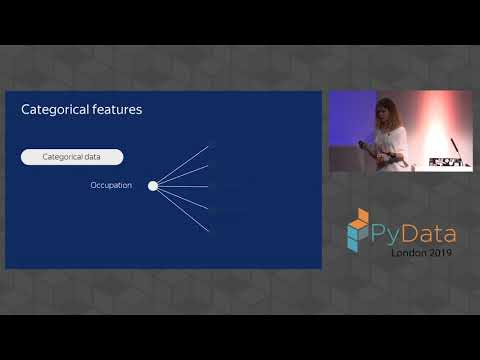

In [99]:
# Mastering gradient boosting with CatBoost
YouTubeVideo('usdEWSDisS0')

<a id='section8'></a>

## 8. Feature Importance
Which features of the best model were most important for making predictions?

In [100]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
5,0.881223,embarked_Q
4,1.339150,embarked_C
10,1.752221,pclass_2
6,2.049794,embarked_S
9,2.728337,pclass_1
11,7.620394,pclass_3
2,9.008261,Parch
1,10.552313,SibSp
8,14.375119,sex_male
7,14.473568,sex_female


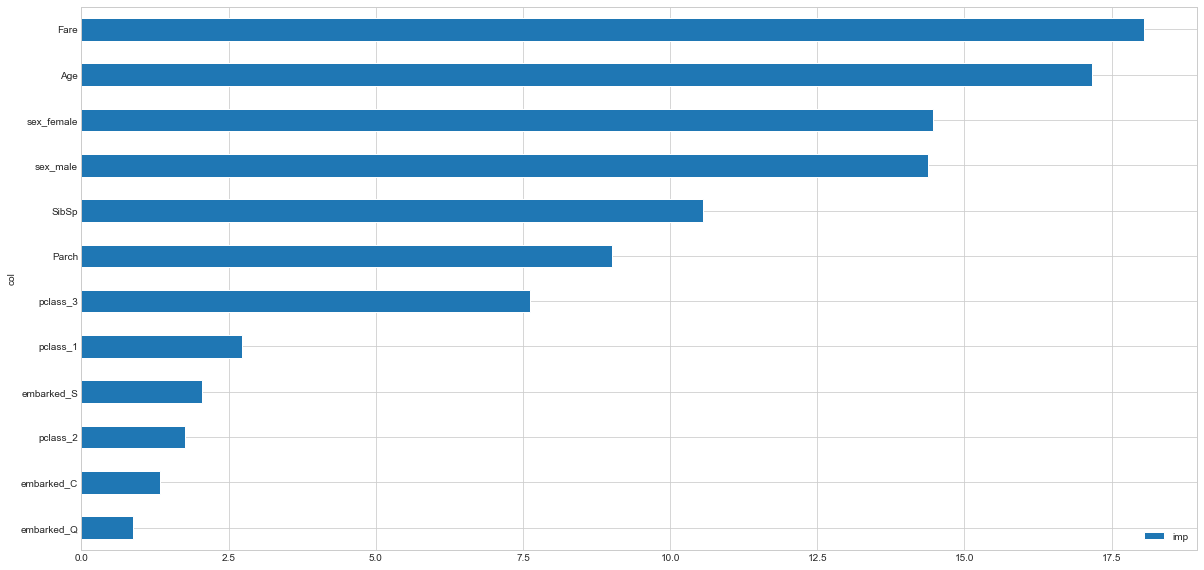

In [101]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

#### Why would you want feature importance?

Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

<a id='section9'></a>

## 9. Precision and Recall

Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

**Recall** = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

**Precision** = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an **F1 score.**

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [102]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8888984216539593
Recall: 0.734735294117647
F1: 0.8043859736115476
AUC: 0.9146532492231866


Recall is low, this means there's a higher amount of false negatives (predicting Did not survive when it was actually Survived).

Precision is higher therefore there's less false positives (predicting Survived, when it was actually Did not survive).

**Challenge:** What are some ways to visualise precision and recall? 
*Hint:* You may want to look into what a confusion matrix is, you can find much more information in this blog post: [Beyond Accuracy: Precision and Recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

<a id='section10'></a>

## 10. Kaggle Submission
Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the `df_test` dateframe, encode them and make a prediciton with our model.

In [103]:
# We need our test dataframe to look like this one
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [104]:
# Our test dataframe has some columns our model hasn't been trained on
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
# One hot encode the columns in the test data frame (like X_train)
df_test_embarked_one_hot = pd.get_dummies(df_test['Embarked'], 
                                       prefix='embarked')

df_test_sex_one_hot = pd.get_dummies(df_test['Sex'], 
                                prefix='sex')

df_test_plcass_one_hot = pd.get_dummies(df_test['Pclass'], 
                                   prefix='pclass')

In [106]:
# Combine the test one hot encoded columns with df_test
df_test = pd.concat([df_test, 
                  df_test_embarked_one_hot, 
                  df_test_sex_one_hot, 
                  df_test_plcass_one_hot], axis=1)

In [120]:
# Let's look at test, it should have OneHotEncoded columns now
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


The columns in `df_test` have been converted to the same format at `df_con_enc`. Now we can make predictions on the `df_test` dataframe columns we built a model on.

We can find the columns we made predictions on with `X_train.columns`.

In [108]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [109]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(df_test[wanted_test_columns])

In [110]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0.])

In [111]:
# Create a submisison dataframe and append the relevant columns
df_submission = pd.DataFrame()
df_submission['PassengerId'] = df_test['PassengerId']
df_submission['Survived'] = predictions    # our model predictions on the test dataset
df_submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [112]:
# What does our submission have to look like?
df_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


We need our `submission` dataframe to look like the `gender_submisison` dataframe, so we'll turn the `Survived` column into integers.

In [113]:
# Let's convert our submission dataframe 'Survived' column to ints
df_submission['Survived'] = df_submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [114]:
# How does our submission dataframe look?
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [115]:
# Are our test and submission dataframes the same length?
if len(df_submission) == len(df_test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(df_submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [116]:
# Convert submission dataframe to csv for submission to csv 
# for Kaggle submisison
df_submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [117]:
# Check the submission csv to make sure it's in the right format
df_submissions_check = pd.read_csv("../catboost_submission.csv")
df_submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### Submit your .csv to Kaggle! 
The submission page can be found at [www.kaggle.com/c/titanic/submit](
https://www.kaggle.com/c/titanic/submit)

<a id='section11'></a>

## 11. Next Steps

These are all possible options to improve this pipeline. I'd suggest starting with the feature engineering (improving and manipulating the existing data) first.

1.    What can you do with the `Age` feature?
      *    How would fill up all the missing values?
      *    You may want to look into the `interpolate()` function of Pandas for this
<br>
2.    What can you do with the `Name` feature?
      *    What titles did the passengers have? Did this influence their survival?
<br>
3.    What can you do with the `Cabin` feature?
      *    Is there a way to see whether they had a cabin or not?
<br>
4.    Can you combine the `SibSp` and `Parch` features to see if the person was alone or not?
<br>
5.    Could you do a PCA/feature analysis to see what features are more important than others?
      *    Does removing the less important model features improve the model?
<br>
6.    The models take a bunch of hyperparameters but we've mostly used the default settings, is there a way to find which hyperparameters are best to use?
      *    Tip: Check out the `CatBoost` with Python tutorial and the [hyperopt library](https://github.com/hyperopt/hyperopt) to see if you can improve the CatBoost model

    

<a id='section12'></a>

## 12. Conclusion

In this article, we explored an interesting dataset brought to us by [Kaggle](https://www.kaggle.com/c/titanic/overview).

We went through the basic steps of a data science Machine Learning pipeline:
*    Data exploration and visualization: an initial step to formulate hypotheses
*    Data cleaning
*    Feature engineering
*    Feature selection
*    Hyperparameters tuning
*    Submission of the prediction to Kaggle

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/kaggle-titanic) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/deliveroo/blob/master/Kaggle%20Titanic%20EDA%2023122019.ipynb).

Many articles and submission exist for this project so if you have kindly taken the time to read through my workbook, I would be more than happy if you have any suggestion as to how the solution can be improved.

<a id='section13'></a>

## 13. Bibliography

* [Code with me (live): How to make your first Kaggle submission from scratch! YouTube webcast by Daniel Bourke](https://www.youtube.com/watch?v=f1y9wDDxWnA) - Daniel has done a great job to record a live coding session, going through this Machine Learning project from beginning to the end.
<br>

* [Sklearn Classification Notebook by Daniel Furasso](https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb) - Daniel has done some epic work showing how you can take a bigger dataset, clean it up and perform some similar classification work from scratch. It would be a great next step after going through this one.
<br>

* [Encoding categorical features in Python blog post by Practical Python Business](http://pbpython.com/categorical-encoding.html) - this blog post sheds some great light on how to deal with categorical features in Python. The rest of the website contains plenty more great information for using Python in a business environment.
<br>

* [CatBoost Python tutorial on GitHub](https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb) - the tutorial is based on the Titanic Dataset and has some great tricks to improve the results in this notebook.
<br>

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)